# Graphs and data from the multiple runs
All the data is in the training_results directory, under the name of the run. Inside each run is multiple folders, each called run_i where i is the run number.
Inside each run is a json file with the results from the run. The json file is a dictionary with the following keys:
"train_losses",
"train_ious",
"valid_losses",
"valid_ious",
"seed".

## Imports

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import json

## Union Learning

### Load the data

In [61]:
data = []
for run in os.listdir("../training_results/union"):
    with open(f"../training_results/union/{run}/trainResults.json", "r") as f:
        data.append(json.load(f))
df = pd.DataFrame(data)
df.drop(columns=["seed"], inplace=True)
df

,train_losses,train_ious,valid_losses,valid_ious
0,"[0.7901589871875426, 0.787292210754176, 0.7864...","[0.48110449687898277, 0.5351733183631656, 0.54...","[0.7869941130280494, 0.7862793490290642, 0.785...","[0.5501437803569863, 0.5739369908285782, 0.563..."
1,"[0.7894566842934966, 0.787128700988105, 0.7864...","[0.49175471687042, 0.5374273901445598, 0.54487...","[0.7867538034915924, 0.785522848367691, 0.7850...","[0.5514451755647648, 0.5589613334187277, 0.583..."
2,"[0.7901986385017704, 0.7872679121169953, 0.786...","[0.466434181784211, 0.5351312343826417, 0.5475...","[0.7858251869678498, 0.7859382063150406, 0.784...","[0.5579419128658574, 0.5449019672974781, 0.572..."
3,"[0.7908811617580405, 0.7875477267620387, 0.786...","[0.45028387153227917, 0.5309989884598774, 0.54...","[0.7859153151512146, 0.7862497463822364, 0.785...","[0.5595266747302433, 0.53669773280332, 0.56705..."
4,"[0.7906481081659867, 0.7871261985888061, 0.786...","[0.4568774411846264, 0.5350286076164452, 0.552...","[0.7863656938076019, 0.7857709303498268, 0.786...","[0.5407976949621751, 0.5702154144330612, 0.530..."


## Plot the data
Boxchart with the last value of the training and validation losses and ious using sns

In [62]:
sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=1.5)
sns.set_style("whitegrid")
sns.set_palette("colorblind")

### Losses

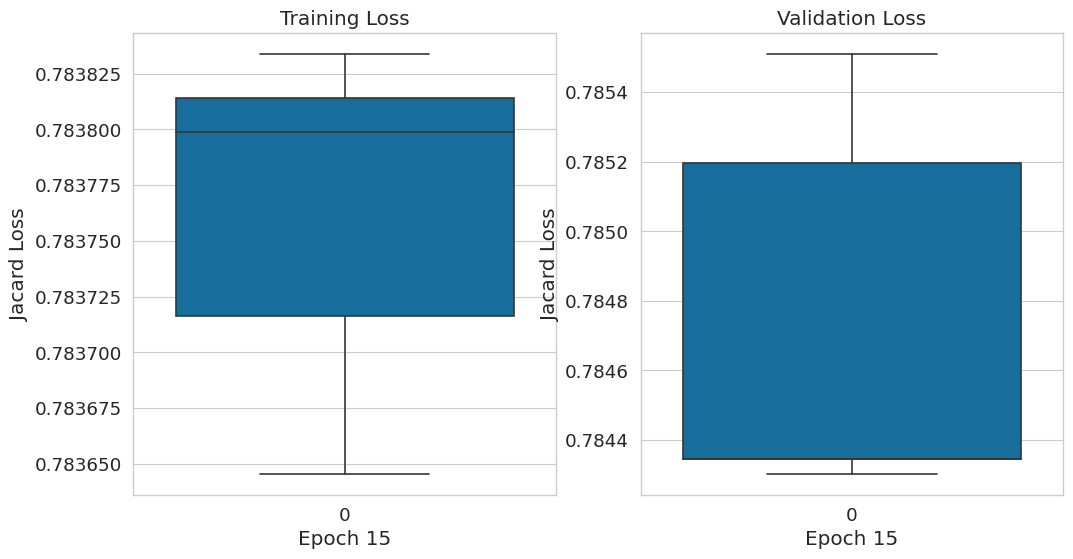

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=df["train_losses"].apply(lambda x: x[-1]), ax=ax[0])
sns.boxplot(data=df["valid_losses"].apply(lambda x: x[-1]), ax=ax[1])
ax[0].set_title("Training Loss")
ax[1].set_title("Validation Loss")
# Set axis label to final value
ax[0].set(xlabel="Epoch 15")
ax[1].set(xlabel="Epoch 15")
ax[0].set(ylabel="Jaccard Loss")
ax[1].set(ylabel="Jaccard Loss")
plt.show()

### IOUs

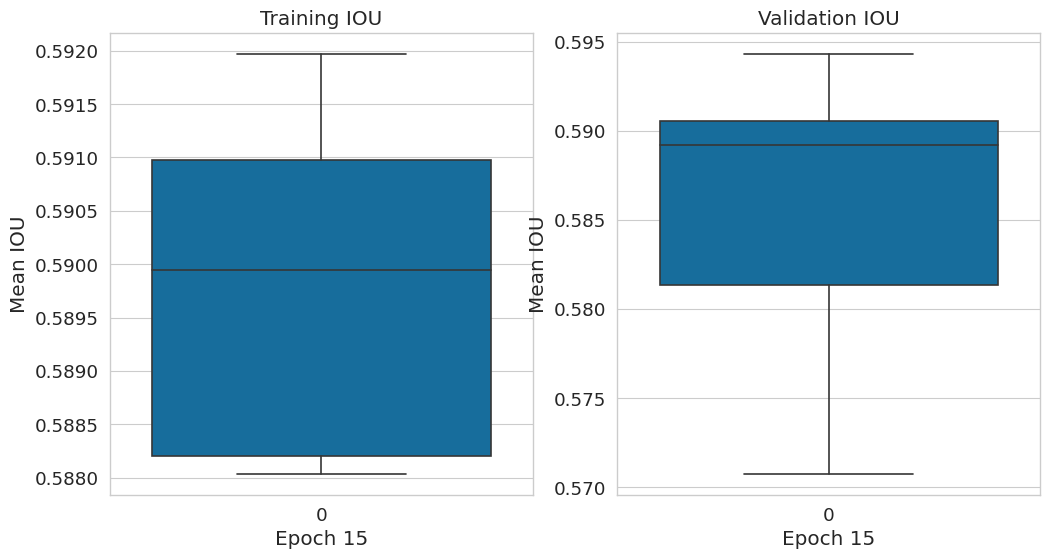

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=df["train_ious"].apply(lambda x: x[-1]), ax=ax[0])
sns.boxplot(data=df["valid_ious"].apply(lambda x: x[-1]), ax=ax[1])
ax[0].set_title("Training IOU")
ax[1].set_title("Validation IOU")
# Set axis label to final value
ax[0].set(xlabel="Epoch 15")
ax[1].set(xlabel="Epoch 15")
ax[0].set(ylabel="Mean IOU")
ax[1].set(ylabel="Mean IOU")
plt.show()

### Lineplots of the losses and ious
The 5 runs are plotted in the same graph, lightly transparent with an average non-transparent line. The average line is the mean of the 5 runs.
One can see that the average line is a good approximation of the 5 runs.

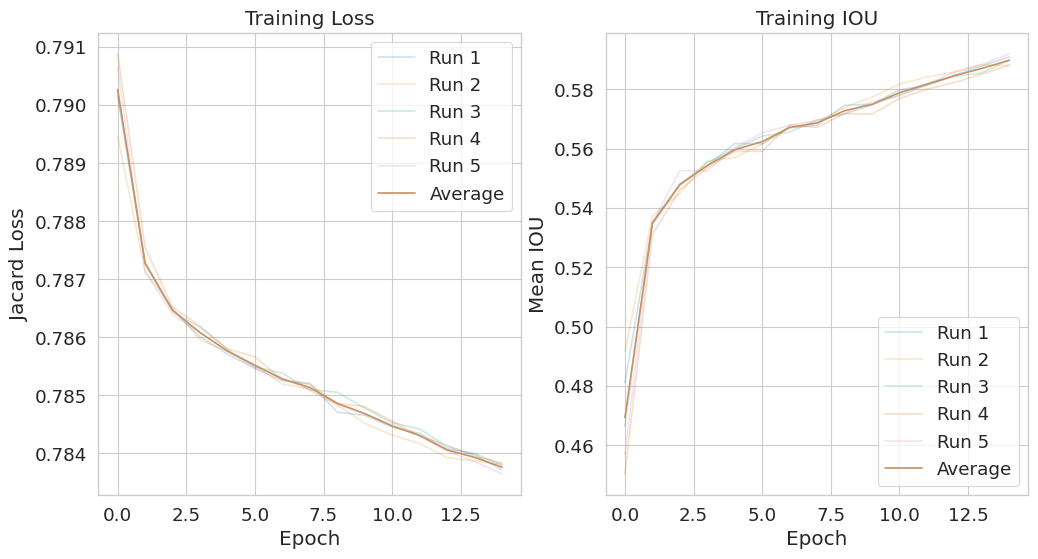

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
for i in range(5):
    ax[0].plot(df["train_losses"][i], alpha=0.2)
    ax[1].plot(df["train_ious"][i], alpha=0.2)
ax[0].plot(np.mean(df["train_losses"].tolist(), axis=0), alpha=1)
ax[1].plot(np.mean(df["train_ious"].tolist(), axis=0), alpha=1)
ax[0].set_title("Training Loss")
ax[1].set_title("Training IOU")
ax[0].set(xlabel="Epoch")
ax[1].set(xlabel="Epoch")
ax[0].set(ylabel="Jaccard Loss")
ax[1].set(ylabel="Mean IOU")
# Create legend
ax[0].legend(["Run 1", "Run 2", "Run 3", "Run 4", "Run 5", "Average"])
ax[1].legend(["Run 1", "Run 2", "Run 3", "Run 4", "Run 5", "Average"])
plt.show()

### Validation losses and ious

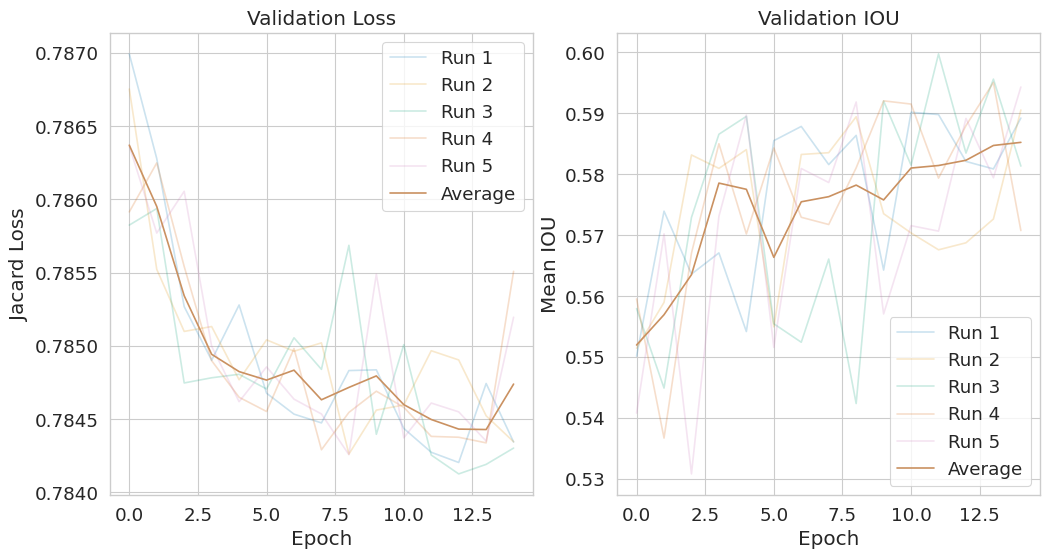

In [66]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
for i in range(5):
    ax[0].plot(df["valid_losses"][i], alpha=0.2)
    ax[1].plot(df["valid_ious"][i], alpha=0.2)
ax[0].plot(np.mean(df["valid_losses"].tolist(), axis=0), alpha=1)
ax[1].plot(np.mean(df["valid_ious"].tolist(), axis=0), alpha=1)
ax[0].set_title("Validation Loss")
ax[1].set_title("Validation IOU")
ax[0].set(xlabel="Epoch")
ax[1].set(xlabel="Epoch")
ax[0].set(ylabel="Jaccard Loss")
ax[1].set(ylabel="Mean IOU")
ax[0].legend(["Run 1", "Run 2", "Run 3", "Run 4", "Run 5", "Average"])
ax[1].legend(["Run 1", "Run 2", "Run 3", "Run 4", "Run 5", "Average"])
plt.show()

## Curriculum Learning
Same graphs as above, but for the curriculum learning


## Load the data

In [67]:
data = []
for run in os.listdir("../training_results/curriculum"):
    with open(f"../training_results/curriculum/{run}/trainResults.json", "r") as f:
        data.append(json.load(f))
curr_df = pd.DataFrame(data)
curr_df.drop(columns=["seed"], inplace=True)
curr_df

,train_losses,train_ious,valid_losses,valid_ious
0,"[0.7992157897641582, 0.7877247122026259, 0.785...","[0.39997009304494596, 0.5065700433841138, 0.55...","[0.7886897906661033, 0.7884789511561394, 0.787...","[0.4889461669514303, 0.49554019150260925, 0.51..."
1,"[0.794089271176246, 0.7862721758504068, 0.7853...","[0.43810524687496394, 0.5493732692473238, 0.57...","[0.7878977507352829, 0.7876323699951172, 0.786...","[0.4937379334607204, 0.5096405409966217, 0.520..."
2,"[0.7977194061843298, 0.7873073213843889, 0.785...","[0.3951742945025433, 0.5224019854807277, 0.562...","[0.7888991683721542, 0.786997127532959, 0.7861...","[0.4885957364191769, 0.5294392345595281, 0.551..."
3,"[0.7954302590380433, 0.7868692631362587, 0.785...","[0.42168722482493176, 0.5394239338897524, 0.58...","[0.7879811197519302, 0.7868303313851357, 0.786...","[0.5237928554326687, 0.544682068038633, 0.5502..."
4,"[0.797283278357598, 0.7874283796997481, 0.7851...","[0.3972132729801913, 0.5362692634567756, 0.579...","[0.7890709564089775, 0.7864235833287239, 0.786...","[0.49547669324216875, 0.5507045000036066, 0.54..."


In [68]:
sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=1.5)
sns.set_style("whitegrid")
sns.set_palette("colorblind")

## Boxplot

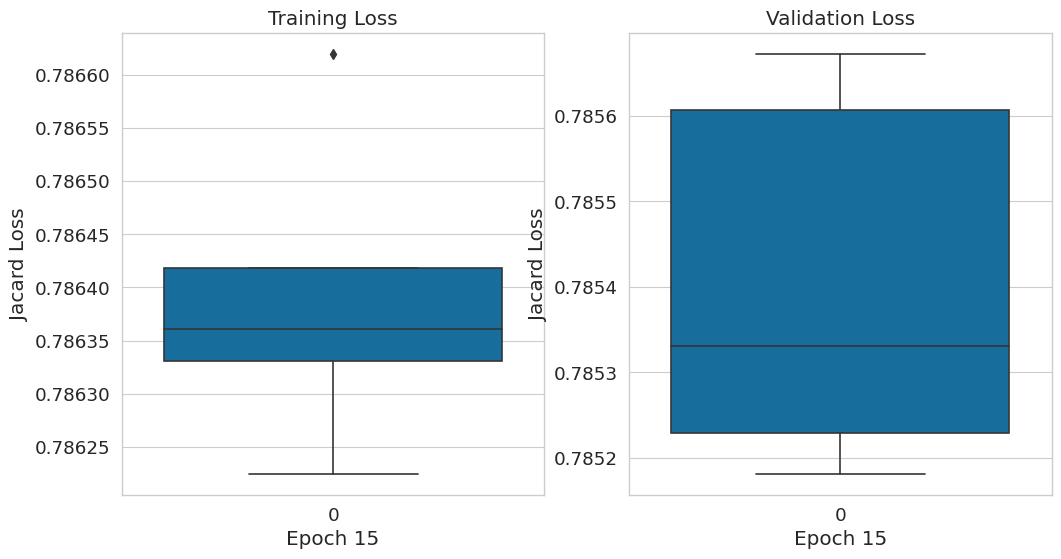

In [69]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=curr_df["train_losses"].apply(lambda x: x[-1]), ax=ax[0])
sns.boxplot(data=curr_df["valid_losses"].apply(lambda x: x[-1]), ax=ax[1])
ax[0].set_title("Training Loss")
ax[1].set_title("Validation Loss")
# Set axis label to final value
ax[0].set(xlabel="Epoch 15")
ax[1].set(xlabel="Epoch 15")
ax[0].set(ylabel="Jaccard Loss")
ax[1].set(ylabel="Jaccard Loss")
plt.show()


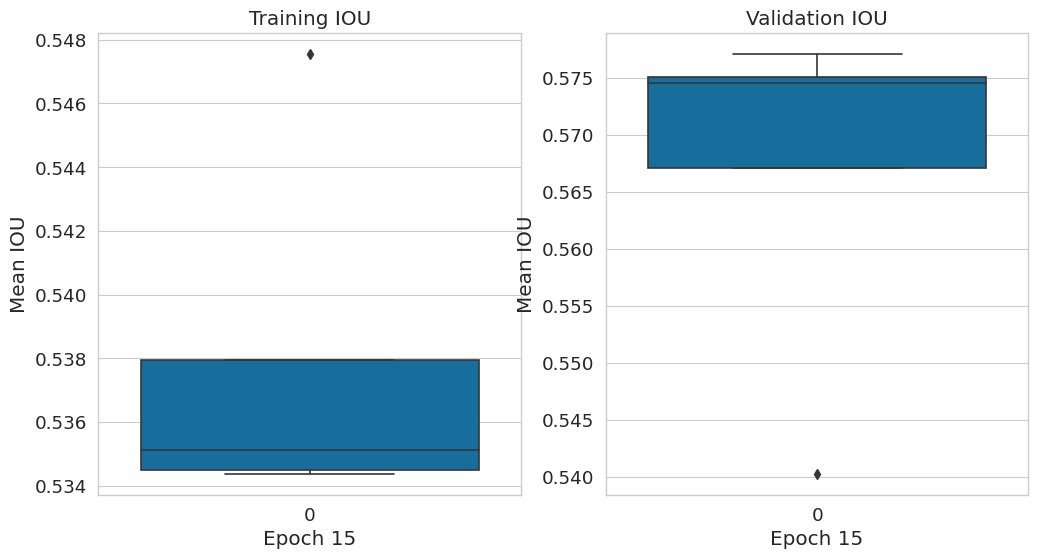

In [70]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=curr_df["train_ious"].apply(lambda x: x[-1]), ax=ax[0])
sns.boxplot(data=curr_df["valid_ious"].apply(lambda x: x[-1]), ax=ax[1])
ax[0].set_title("Training IOU")
ax[1].set_title("Validation IOU")
# Set axis label to final value
ax[0].set(xlabel="Epoch 15")
ax[1].set(xlabel="Epoch 15")
ax[0].set(ylabel="Mean IOU")
ax[1].set(ylabel="Mean IOU")
plt.show()

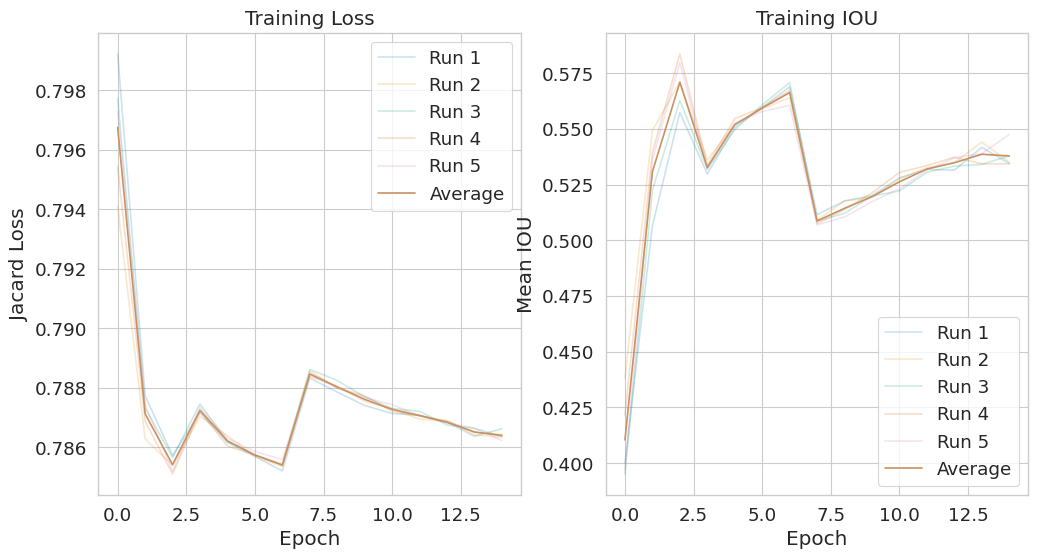

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
for i in range(5):
    ax[0].plot(curr_df["train_losses"][i], alpha=0.2)
    ax[1].plot(curr_df["train_ious"][i], alpha=0.2)
ax[0].plot(np.mean(curr_df["train_losses"].tolist(), axis=0), alpha=1)
ax[1].plot(np.mean(curr_df["train_ious"].tolist(), axis=0), alpha=1)
ax[0].set_title("Training Loss")
ax[1].set_title("Training IOU")
ax[0].set(xlabel="Epoch")
ax[1].set(xlabel="Epoch")
ax[0].set(ylabel="Jaccard Loss")
ax[1].set(ylabel="Mean IOU")
ax[0].legend(["Run 1", "Run 2", "Run 3", "Run 4", "Run 5", "Average"])
ax[1].legend(["Run 1", "Run 2", "Run 3", "Run 4", "Run 5", "Average"])
plt.show()

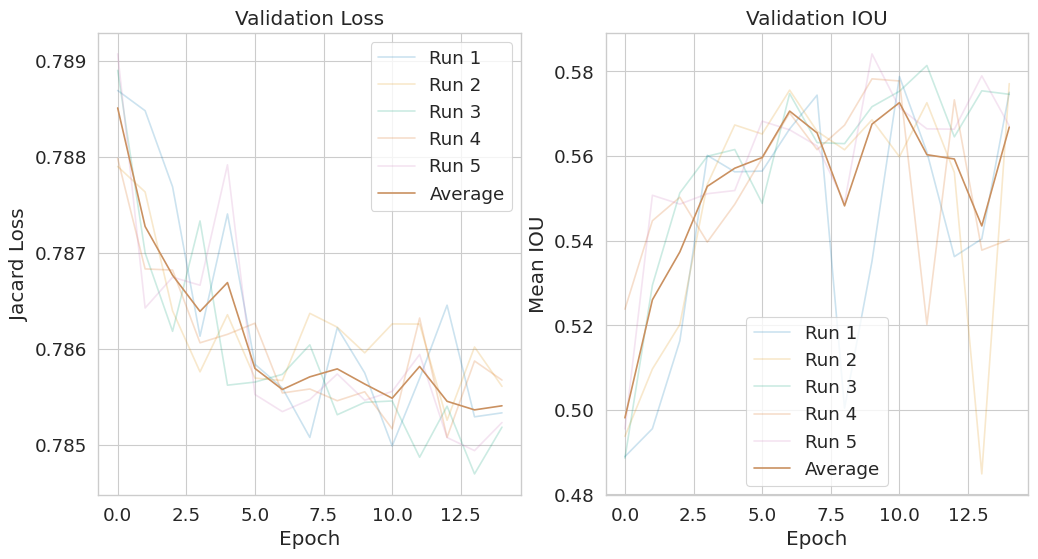

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
for i in range(5):
    ax[0].plot(curr_df["valid_losses"][i], alpha=0.2)
    ax[1].plot(curr_df["valid_ious"][i], alpha=0.2)
ax[0].plot(np.mean(curr_df["valid_losses"].tolist(), axis=0), alpha=1)
ax[1].plot(np.mean(curr_df["valid_ious"].tolist(), axis=0), alpha=1)
ax[0].set_title("Validation Loss")
ax[1].set_title("Validation IOU")
ax[0].set(xlabel="Epoch")
ax[1].set(xlabel="Epoch")
ax[0].set(ylabel="Jaccard Loss")
ax[1].set(ylabel="Mean IOU")
ax[0].legend(["Run 1", "Run 2", "Run 3", "Run 4", "Run 5", "Average"])
ax[1].legend(["Run 1", "Run 2", "Run 3", "Run 4", "Run 5", "Average"])
plt.show()

## Union and Curriculum next to each other

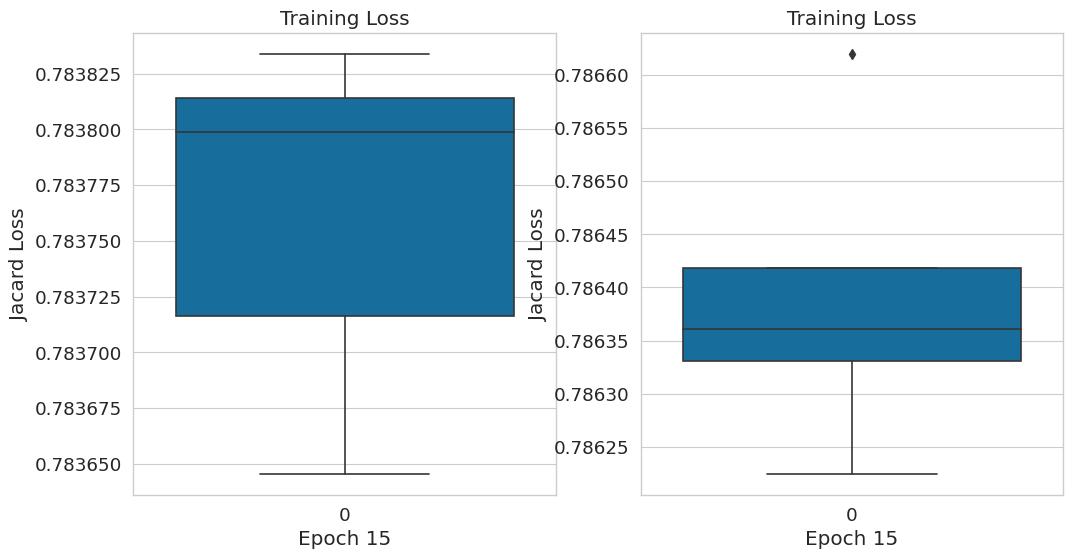

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=df["train_losses"].apply(lambda x: x[-1]), ax=ax[0])
sns.boxplot(data=curr_df["train_losses"].apply(lambda x: x[-1]), ax=ax[1])
ax[0].set_title("Training Loss")
ax[1].set_title("Training Loss")
ax[0].set(xlabel="Epoch 15")
ax[1].set(xlabel="Epoch 15")
ax[0].set(ylabel="Jaccard Loss")
ax[1].set(ylabel="Jaccard Loss")
plt.show()

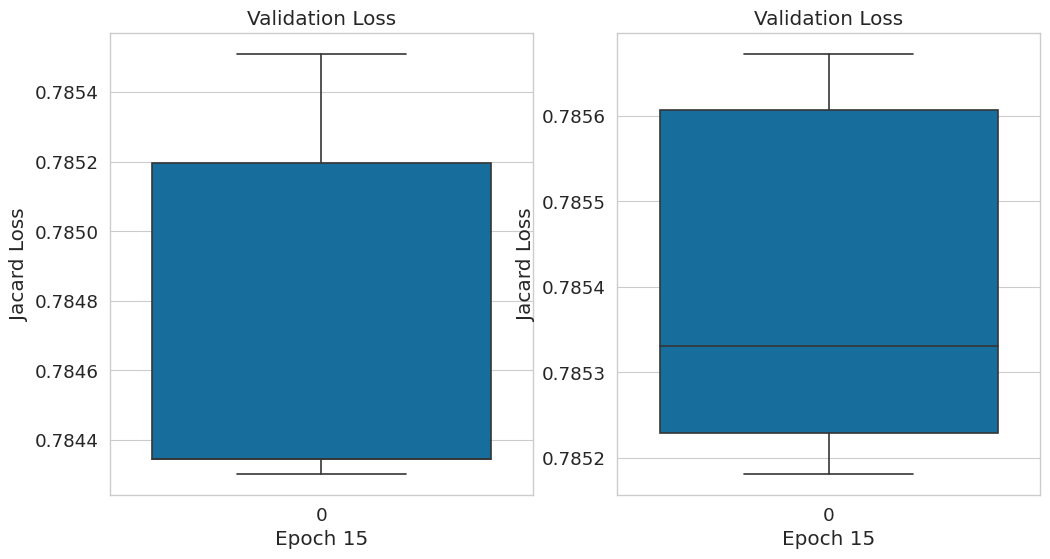

In [74]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=df["valid_losses"].apply(lambda x: x[-1]), ax=ax[0])
sns.boxplot(data=curr_df["valid_losses"].apply(lambda x: x[-1]), ax=ax[1])
ax[0].set_title("Validation Loss")
ax[1].set_title("Validation Loss")
ax[0].set(xlabel="Epoch 15")
ax[1].set(xlabel="Epoch 15")
ax[0].set(ylabel="Jaccard Loss")
ax[1].set(ylabel="Jaccard Loss")
plt.show()

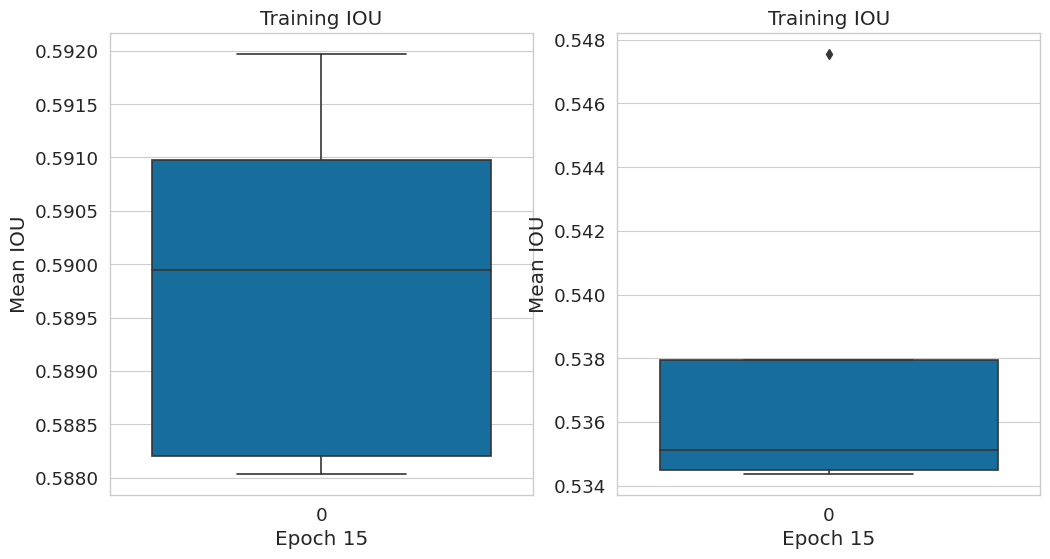

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=df["train_ious"].apply(lambda x: x[-1]), ax=ax[0])
sns.boxplot(data=curr_df["train_ious"].apply(lambda x: x[-1]), ax=ax[1])
ax[0].set_title("Training IOU")
ax[1].set_title("Training IOU")
ax[0].set(xlabel="Epoch 15")
ax[1].set(xlabel="Epoch 15")
ax[0].set(ylabel="Mean IOU")
ax[1].set(ylabel="Mean IOU")
plt.show()

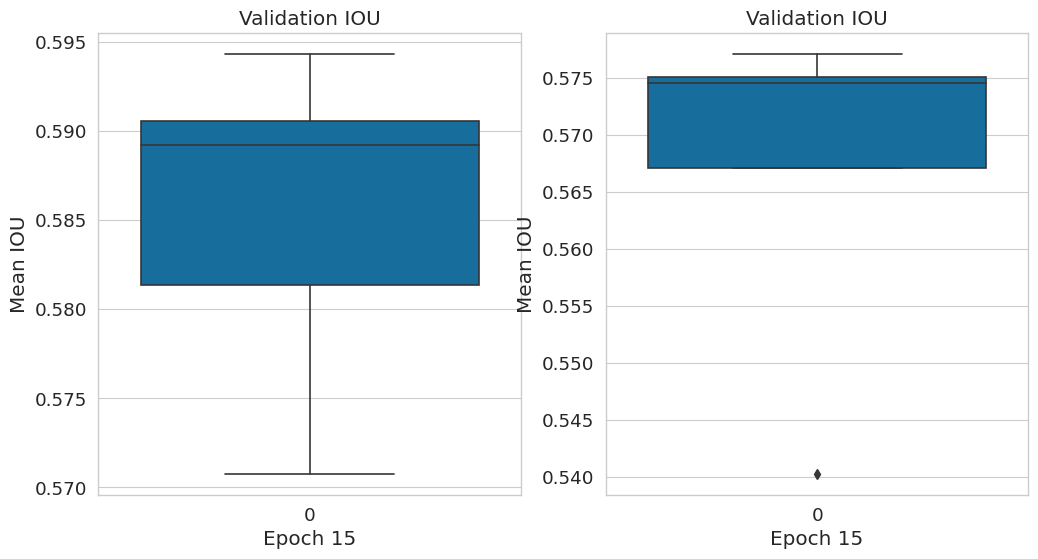

In [76]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=df["valid_ious"].apply(lambda x: x[-1]), ax=ax[0])
sns.boxplot(data=curr_df["valid_ious"].apply(lambda x: x[-1]), ax=ax[1])
ax[0].set_title("Validation IOU")
ax[1].set_title("Validation IOU")
ax[0].set(xlabel="Epoch 15")
ax[1].set(xlabel="Epoch 15")
ax[0].set(ylabel="Mean IOU")
ax[1].set(ylabel="Mean IOU")
plt.show()

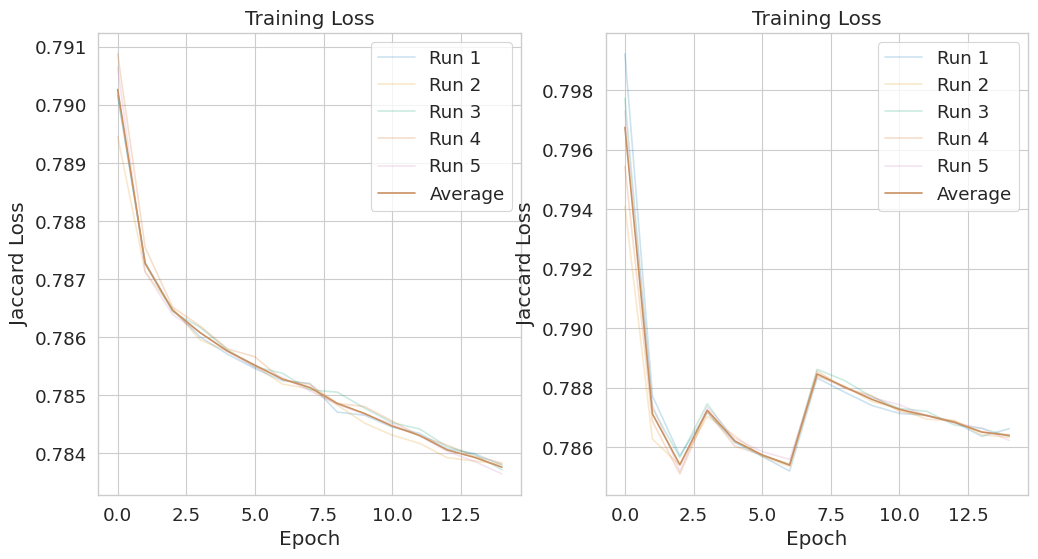

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
for i in range(5):
    ax[0].plot(df["train_losses"][i], alpha=0.2)
    ax[1].plot(curr_df["train_losses"][i], alpha=0.2)
ax[0].plot(np.mean(df["train_losses"].tolist(), axis=0), alpha=1)
ax[1].plot(np.mean(curr_df["train_losses"].tolist(), axis=0), alpha=1)
ax[0].set_title("Training Loss")
ax[1].set_title("Training Loss")
ax[0].set(xlabel="Epoch")
ax[1].set(xlabel="Epoch")
ax[0].set(ylabel="Jaccard Loss")
ax[1].set(ylabel="Jaccard Loss")
ax[0].legend(["Run 1", "Run 2", "Run 3", "Run 4", "Run 5", "Average"])
ax[1].legend(["Run 1", "Run 2", "Run 3", "Run 4", "Run 5", "Average"])
plt.show()

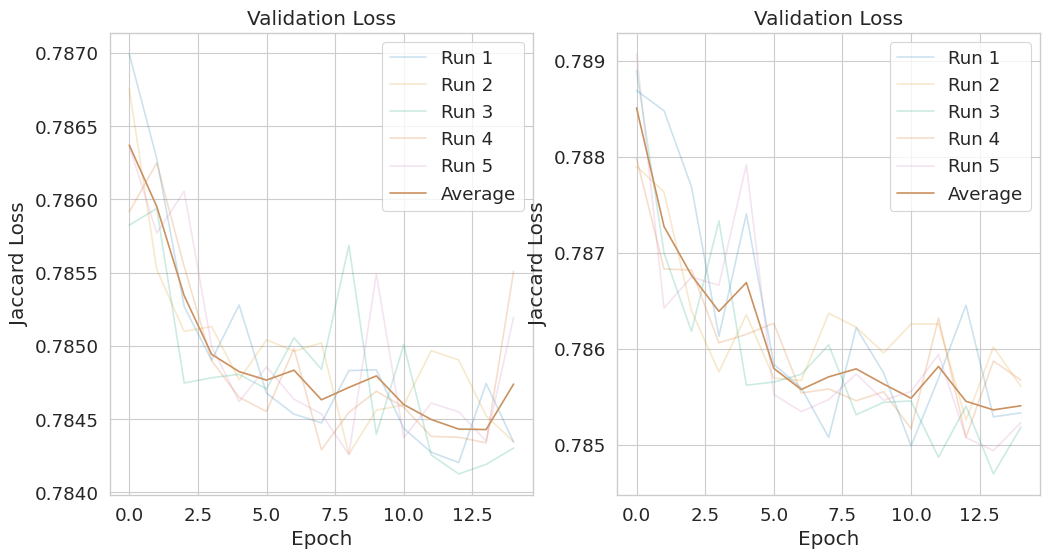

In [78]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
for i in range(5):
    ax[0].plot(df["valid_losses"][i], alpha=0.2)
    ax[1].plot(curr_df["valid_losses"][i], alpha=0.2)
ax[0].plot(np.mean(df["valid_losses"].tolist(), axis=0), alpha=1)
ax[1].plot(np.mean(curr_df["valid_losses"].tolist(), axis=0), alpha=1)
ax[0].set_title("Validation Loss")
ax[1].set_title("Validation Loss")
ax[0].set(xlabel="Epoch")
ax[1].set(xlabel="Epoch")
ax[0].set(ylabel="Jaccard Loss")
ax[1].set(ylabel="Jaccard Loss")
ax[0].legend(["Run 1", "Run 2", "Run 3", "Run 4", "Run 5", "Average"])
ax[1].legend(["Run 1", "Run 2", "Run 3", "Run 4", "Run 5", "Average"])
plt.show()

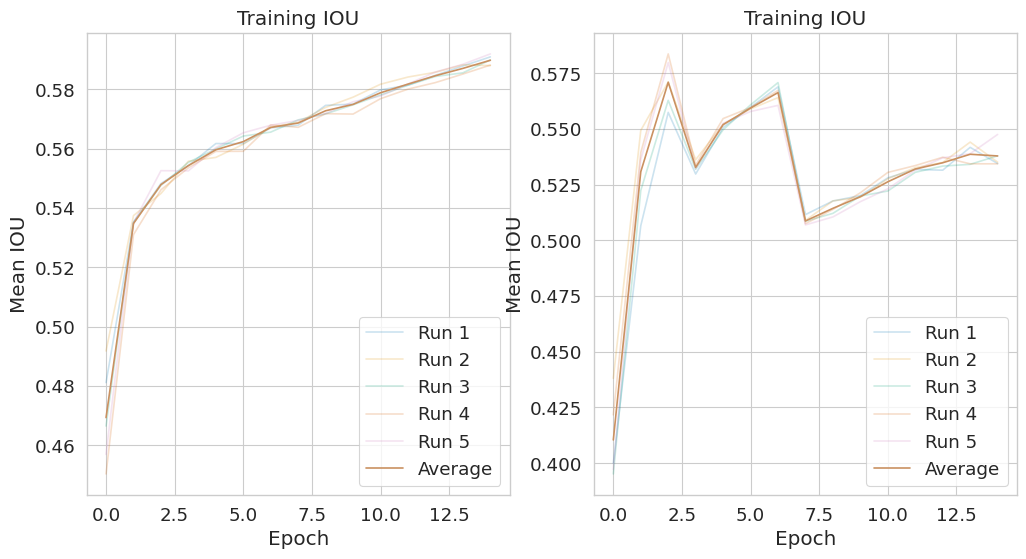

In [79]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
for i in range(5):
    ax[0].plot(df["train_ious"][i], alpha=0.2)
    ax[1].plot(curr_df["train_ious"][i], alpha=0.2)
ax[0].plot(np.mean(df["train_ious"].tolist(), axis=0), alpha=1)
ax[1].plot(np.mean(curr_df["train_ious"].tolist(), axis=0), alpha=1)
ax[0].set_title("Training IOU")
ax[1].set_title("Training IOU")
ax[0].set(xlabel="Epoch")
ax[1].set(xlabel="Epoch")
ax[0].set(ylabel="Mean IOU")
ax[1].set(ylabel="Mean IOU")
ax[0].legend(["Run 1", "Run 2", "Run 3", "Run 4", "Run 5", "Average"])
ax[1].legend(["Run 1", "Run 2", "Run 3", "Run 4", "Run 5", "Average"])
plt.show()


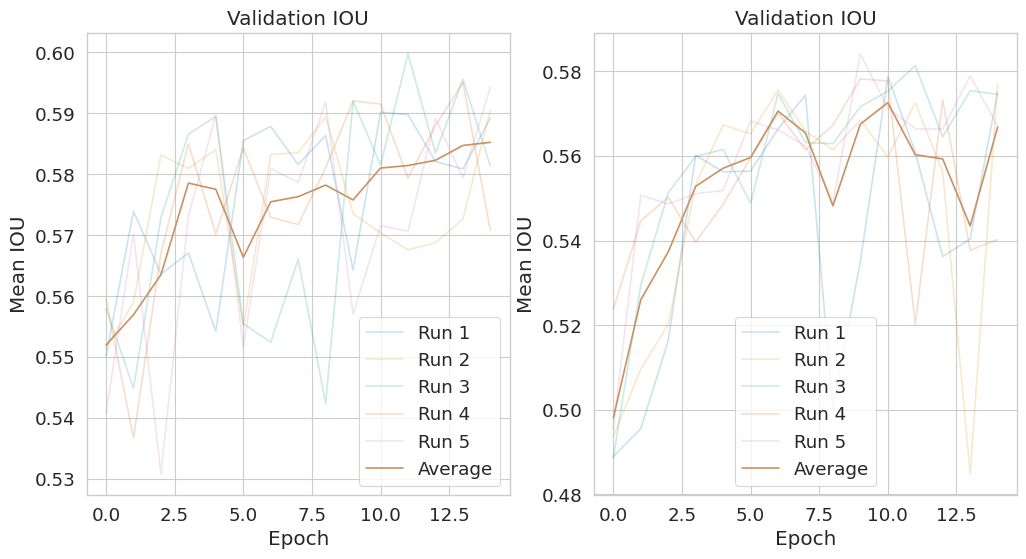

In [80]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
for i in range(5):
    ax[0].plot(df["valid_ious"][i], alpha=0.2)
    ax[1].plot(curr_df["valid_ious"][i], alpha=0.2)
ax[0].plot(np.mean(df["valid_ious"].tolist(), axis=0), alpha=1)
ax[1].plot(np.mean(curr_df["valid_ious"].tolist(), axis=0), alpha=1)
ax[0].set_title("Validation IOU")
ax[1].set_title("Validation IOU")
ax[0].set(xlabel="Epoch")
ax[1].set(xlabel="Epoch")
ax[0].set(ylabel="Mean IOU")
ax[1].set(ylabel="Mean IOU")
ax[0].legend(["Run 1", "Run 2", "Run 3", "Run 4", "Run 5", "Average"])
ax[1].legend(["Run 1", "Run 2", "Run 3", "Run 4", "Run 5", "Average"])
plt.show()
